# Aim:
### Prepaare prediction model for predicting price using below columns
- Price  -- Offer Price in EUROs	
- Age_08_04 -- Age in months as in August 2004
- KM -- Accumulated Kilometers on odometer
- HP -- Horse Power
- cc -- Cylinder Volume in cubic centimeters
- Doors -- Number of doors
- Gears -- Number of gear positions
- Quarterly_Tax -- Quarterly road tax in EUROs
- Weight -- Weight in Kilograms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv(r"C:\Users\ADMIN\Desktop\Data Science\Assignment_5\ToyotaCorolla.csv",
               sep=',', encoding='latin-1',index_col=0)
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df


Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
Id                                                                           
1     13500         23  46986   90  2000      3      5            210    1165
2     13750         23  72937   90  2000      3      5            210    1165
3     13950         24  41711   90  2000      3      5            210    1165
4     14950         26  48000   90  2000      3      5            210    1165
5     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1438   7500         69  20544   86  1300      3      5             69    1025
1439  10845         72  19000   86  1300      3      5             69    1015
1440   8500         71  17016   86  1300      3      5             69    1015
1441   7250         70  16916   86  1300      3      5             69    1015
1442   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [5]:
df.describe().round(2)

Price  Age_08_04         KM       HP        cc    Doors    Gears  \
count   1436.00    1436.00    1436.00  1436.00   1436.00  1436.00  1436.00   
mean   10730.82      55.95   68533.26   101.50   1576.86     4.03     5.03   
std     3626.96      18.60   37506.45    14.98    424.39     0.95     0.19   
min     4350.00       1.00       1.00    69.00   1300.00     2.00     3.00   
25%     8450.00      44.00   43000.00    90.00   1400.00     3.00     5.00   
50%     9900.00      61.00   63389.50   110.00   1600.00     4.00     5.00   
75%    11950.00      70.00   87020.75   110.00   1600.00     5.00     5.00   
max    32500.00      80.00  243000.00   192.00  16000.00     5.00     6.00   

       Quarterly_Tax   Weight  
count        1436.00  1436.00  
mean           87.12  1072.46  
std            41.13    52.64  
min            19.00  1000.00  
25%            69.00  1040.00  
50%            85.00  1070.00  
75%            85.00  1085.00  
max           283.00  1615.00

In [6]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

## Data Visualisation

In [7]:
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

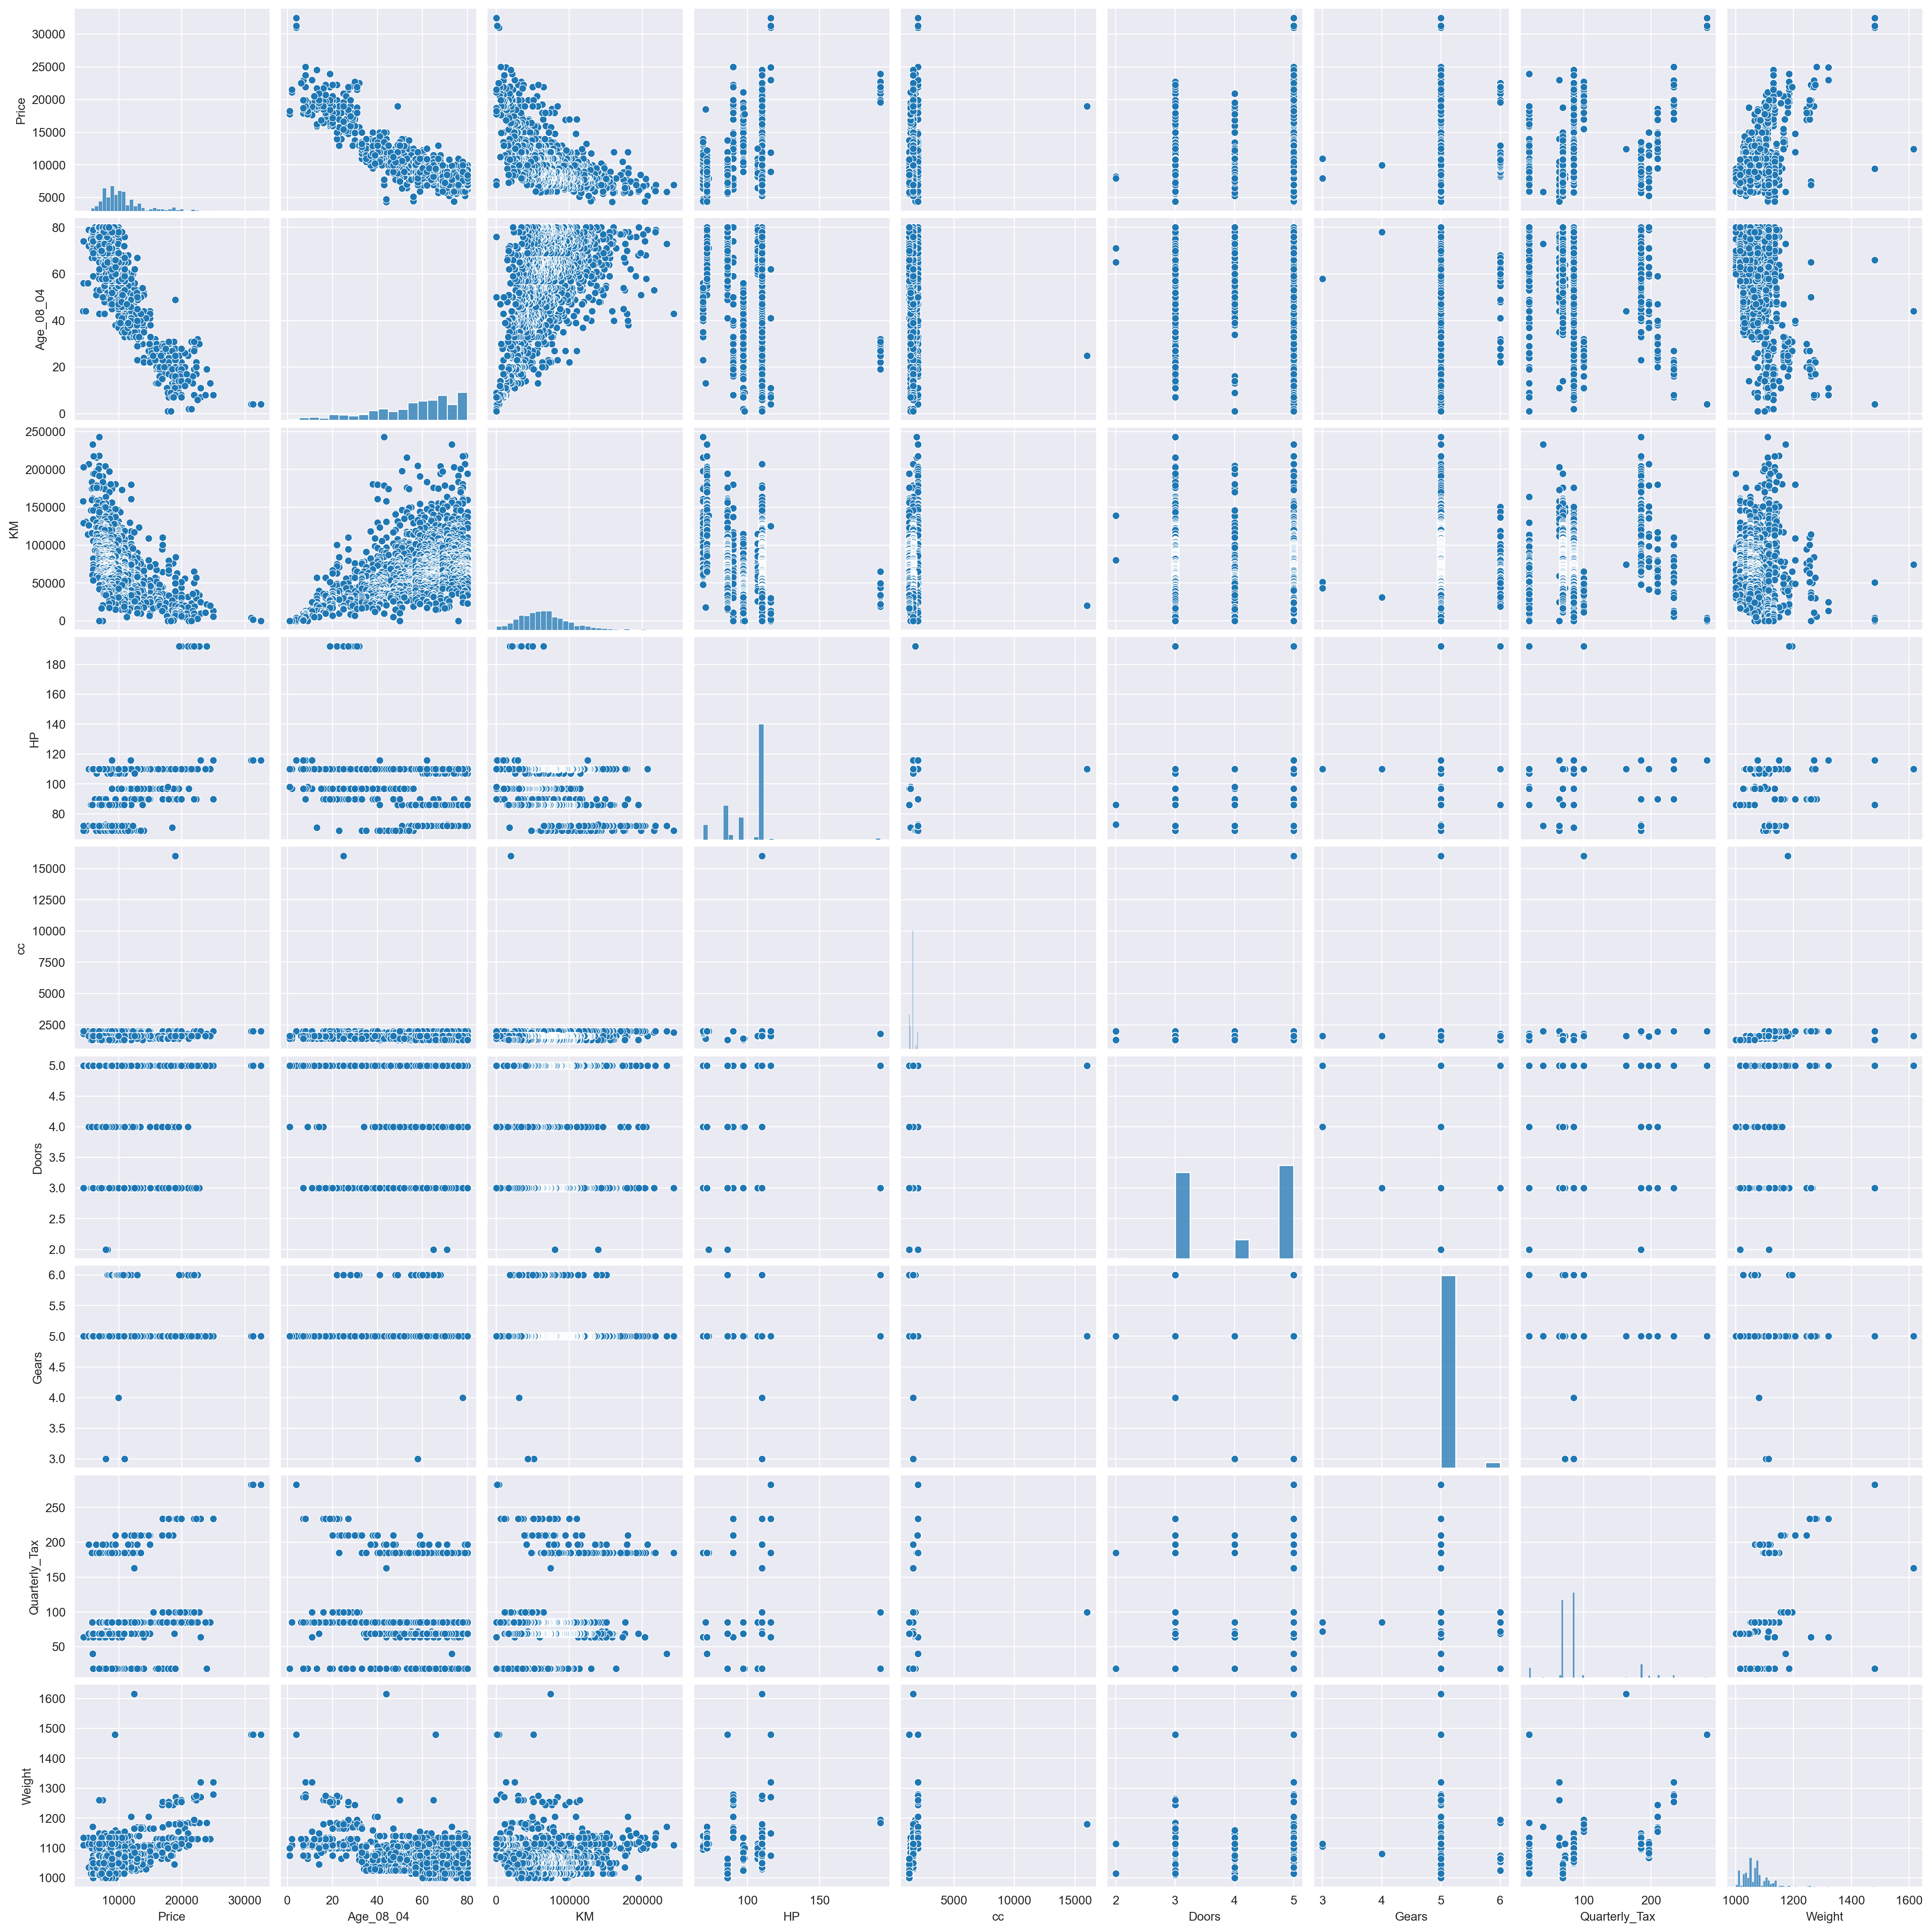

In [8]:
sns.pairplot(df)

In [9]:
df.corr()

Price  Age_08_04        KM        HP        cc     Doors  \
Price          1.000000  -0.876590 -0.569960  0.314990  0.126389  0.185326   
Age_08_04     -0.876590   1.000000  0.505672 -0.156622 -0.098084 -0.148359   
KM            -0.569960   0.505672  1.000000 -0.333538  0.102683 -0.036197   
HP             0.314990  -0.156622 -0.333538  1.000000  0.035856  0.092424   
cc             0.126389  -0.098084  0.102683  0.035856  1.000000  0.079903   
Doors          0.185326  -0.148359 -0.036197  0.092424  0.079903  1.000000   
Gears          0.063104  -0.005364  0.015023  0.209477  0.014629 -0.160141   
Quarterly_Tax  0.219197  -0.198431  0.278165 -0.298432  0.306996  0.109363   
Weight         0.581198  -0.470253 -0.028598  0.089614  0.335637  0.302618   

                  Gears  Quarterly_Tax    Weight  
Price          0.063104       0.219197  0.581198  
Age_08_04     -0.005364      -0.198431 -0.470253  
KM             0.015023       0.278165 -0.028598  
HP             0.209477      -0.298432  0.089614  
cc             0.014629       0.306996  0.335637  
Doors         -0.160141       0.109363  0.302618  
Gears          1.000000      -0.005452  0.020613  
Quarterly_Tax -0.005452       1.000000  0.626134  
Weight         0.020613       0.626134  1.000000

<Axes: >

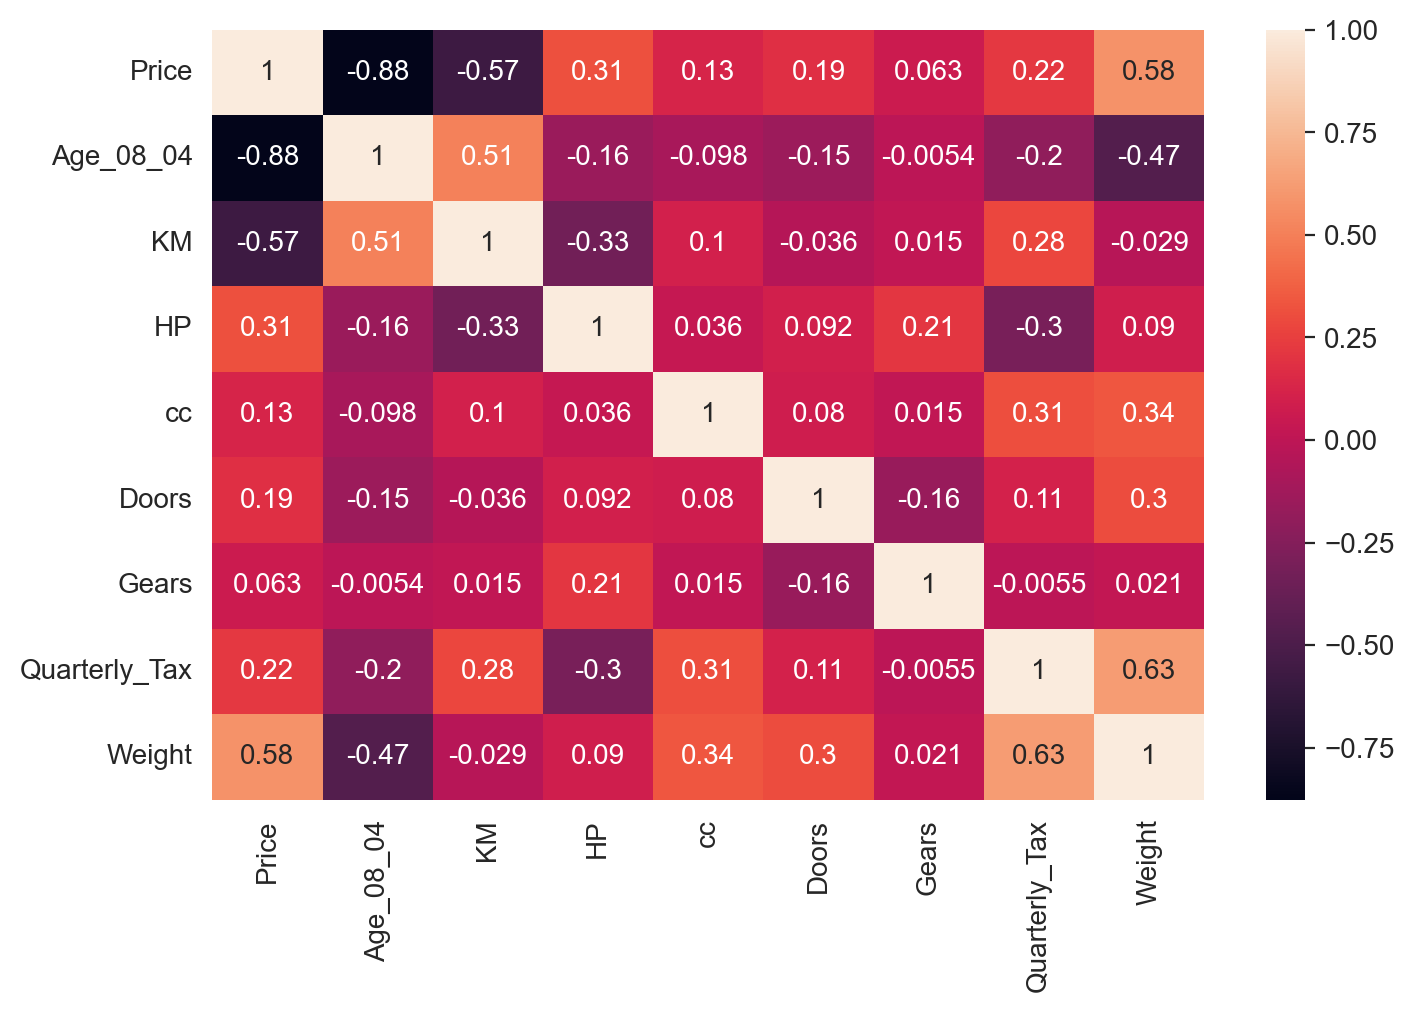

In [10]:
sns.heatmap(df.corr(), annot=True)

## Model Building

In [11]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df).fit()

In [12]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:25:26   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Simple Linear Regression Model

In [13]:
# Profit-cc Model
model1 = smf.ols('Price~cc', data= df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.55e-06
Time:                        21:27:23   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# Profit-Doors Model
model2 = smf.ols('Price~Doors', data= df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Tue, 16 May 2023   Prob (F-statistic):           1.46e-12
Time:                        21:27:39   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

## Calculating VIF

In [16]:
r_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df).fit().rsquared
v_Age_08_04 = 1/(1 - r_Age_08_04)

r_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight', data= df).fit().rsquared
v_KM = 1/(1 - r_KM)

r_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight', data= df).fit().rsquared
v_HP = 1/(1 - r_HP)

r_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data= df).fit().rsquared
v_cc = 1/(1 - r_cc)

r_Doors = smf.ols('Doors~Age_08_04+KM+cc+HP+Gears+Quarterly_Tax+Weight', data= df).fit().rsquared
v_Doors = 1/(1 - r_HP)

r_Gears = smf.ols('Gears~Age_08_04+KM+cc+Doors+HP+Quarterly_Tax+Weight', data= df).fit().rsquared
v_Gears = 1/(1 - r_Gears)

r_Quarterly_Tax = smf.ols('Quarterly_Tax~Age_08_04+KM+cc+Doors+Gears+HP+Weight', data= df).fit().rsquared
v_Quarterly_Tax = 1/(1 - r_Quarterly_Tax)

r_Weight = smf.ols('Weight~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+HP', data= df).fit().rsquared
v_Weight = 1/(1 - r_Weight)

In [17]:
data = pd.DataFrame({
    'Features' : ['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears','Quarterly_Tax', 'Weight'],
    'VIF' : [v_Age_08_04, v_KM, v_HP, v_cc, v_Doors, v_Gears, v_Quarterly_Tax, v_Weight]
})
data

Features       VIF
0      Age_08_04  1.884620
1             KM  1.756905
2             HP  1.419422
3             cc  1.163894
4          Doors  1.419422
5          Gears  1.098723
6  Quarterly_Tax  2.311431
7         Weight  2.516420

In [18]:
cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()

print(cc.rsquared, cc.aic)

0.8637625904386813 24767.078283372837


In [19]:
doors = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight', data= df).fit()

print(doors.rsquared, doors.aic)

0.8635902364277144 24768.893819473007


In [20]:
cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:29:42   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age_08_04      -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation Technique

# 1. Residual Analysis

### As per the subset selection, it is clear that cc column is more important than Doors column as it's R2 value is more and AIC value is less,So we will select cc columns and will drop Doors column

### Normality Test

In [21]:
import statsmodels.api as sm

In [22]:
cc.resid

Id
1      -3310.494470
2      -2520.230185
3      -2848.654675
4      -1474.410164
5      -2470.293832
           ...     
1438   -1292.675166
1439    2554.633006
1440      46.670771
1441   -1327.069163
1442   -3453.281969
Length: 1436, dtype: float64

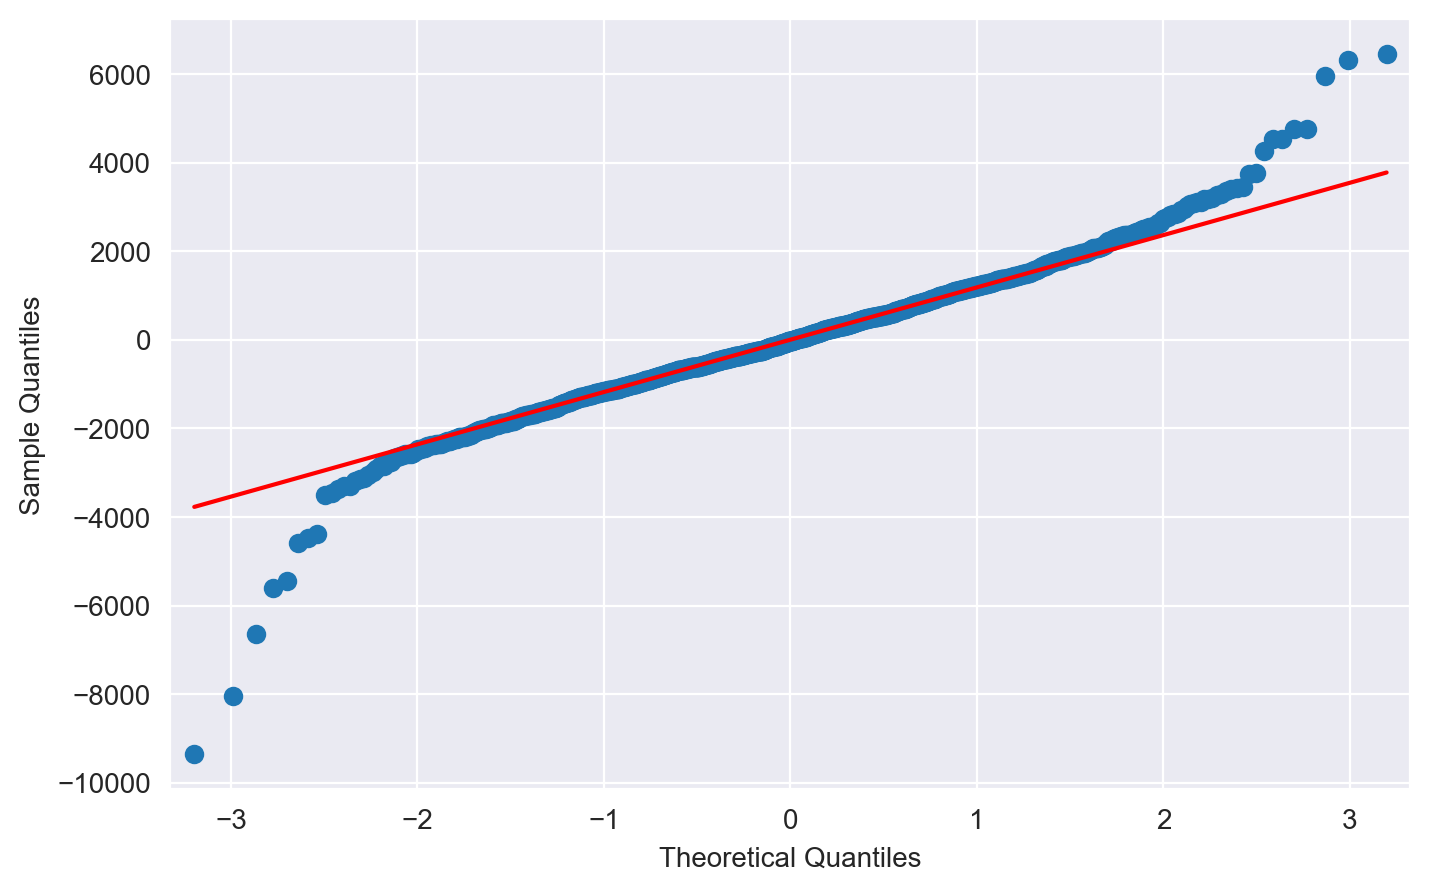

In [23]:
# Q-Q Plot
sm.qqplot(cc.resid, line='q');

# 2 Residual plot of Homoscedasticity
- Homoscedasticity can be checked by plotting a scatter plot between fitted values and residuals

Text(0, 0.5, 'Residuals')

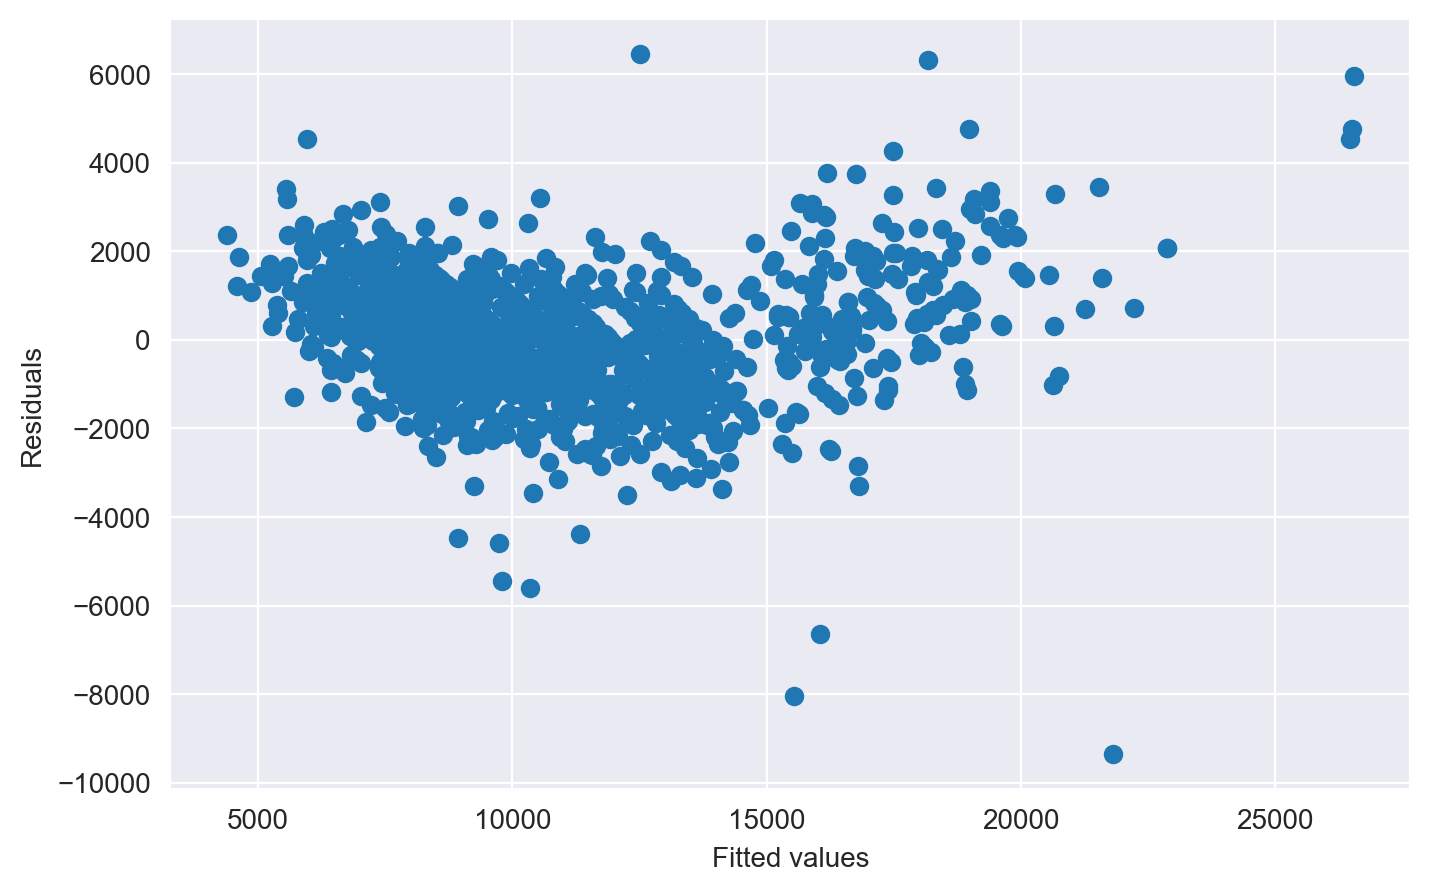

In [24]:
plt.scatter(cc.fittedvalues, cc.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# 3.Residual VS Regressor

In [25]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

eval_env: 1


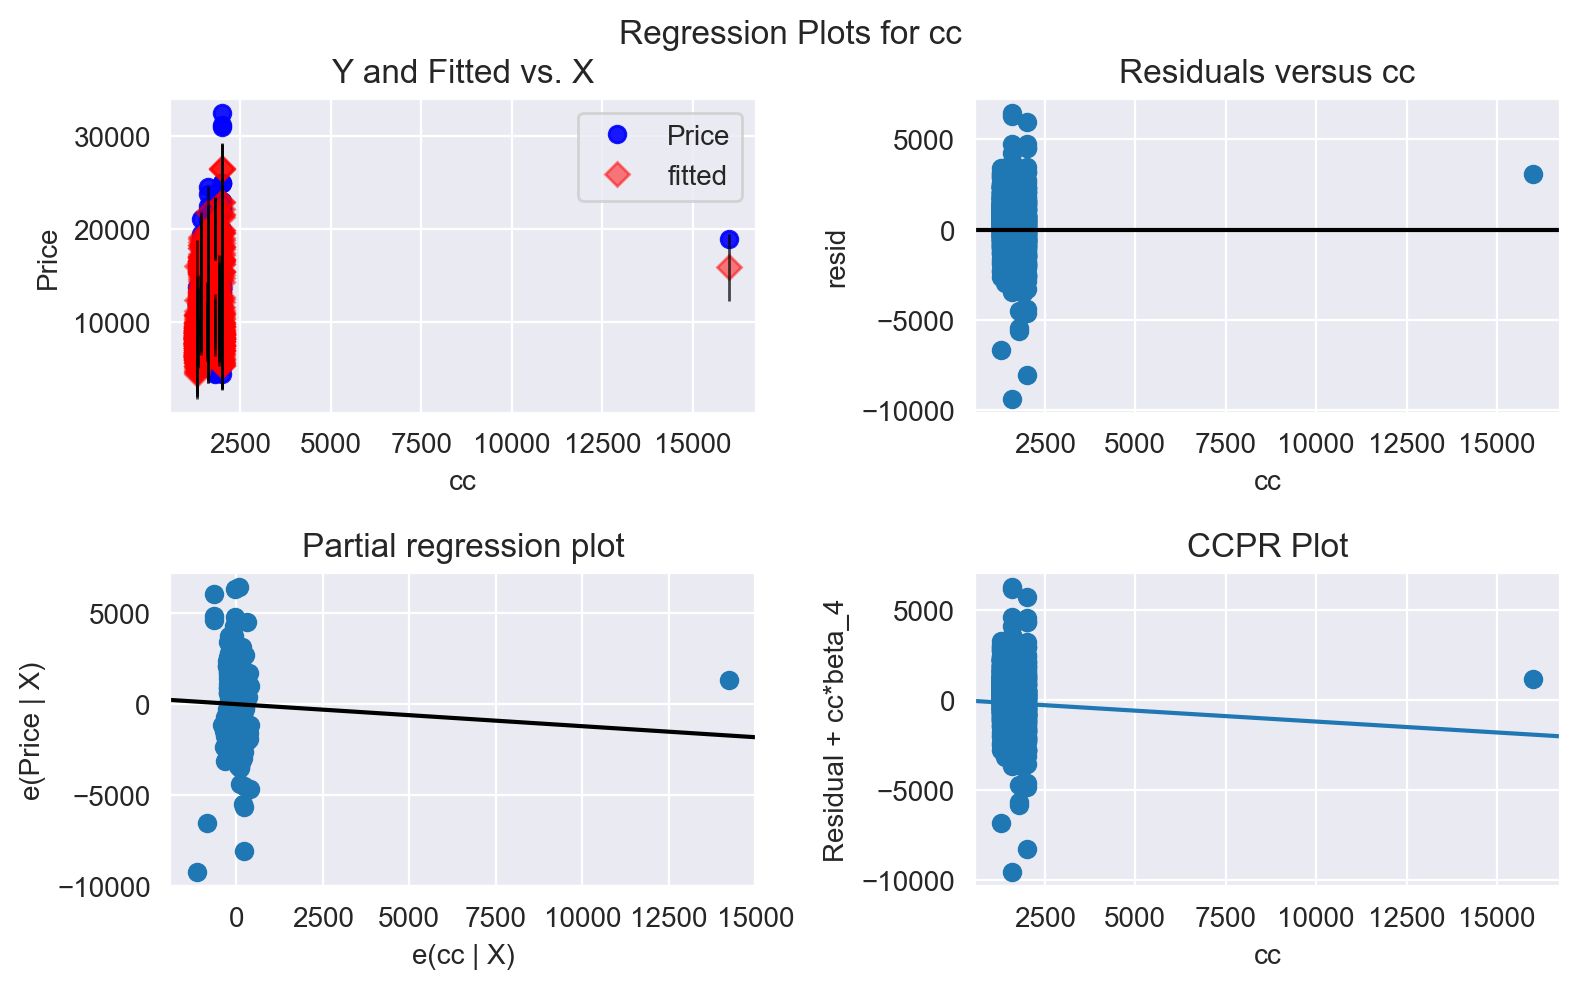

In [26]:
sm.graphics.plot_regress_exog(cc, 'cc');

eval_env: 1


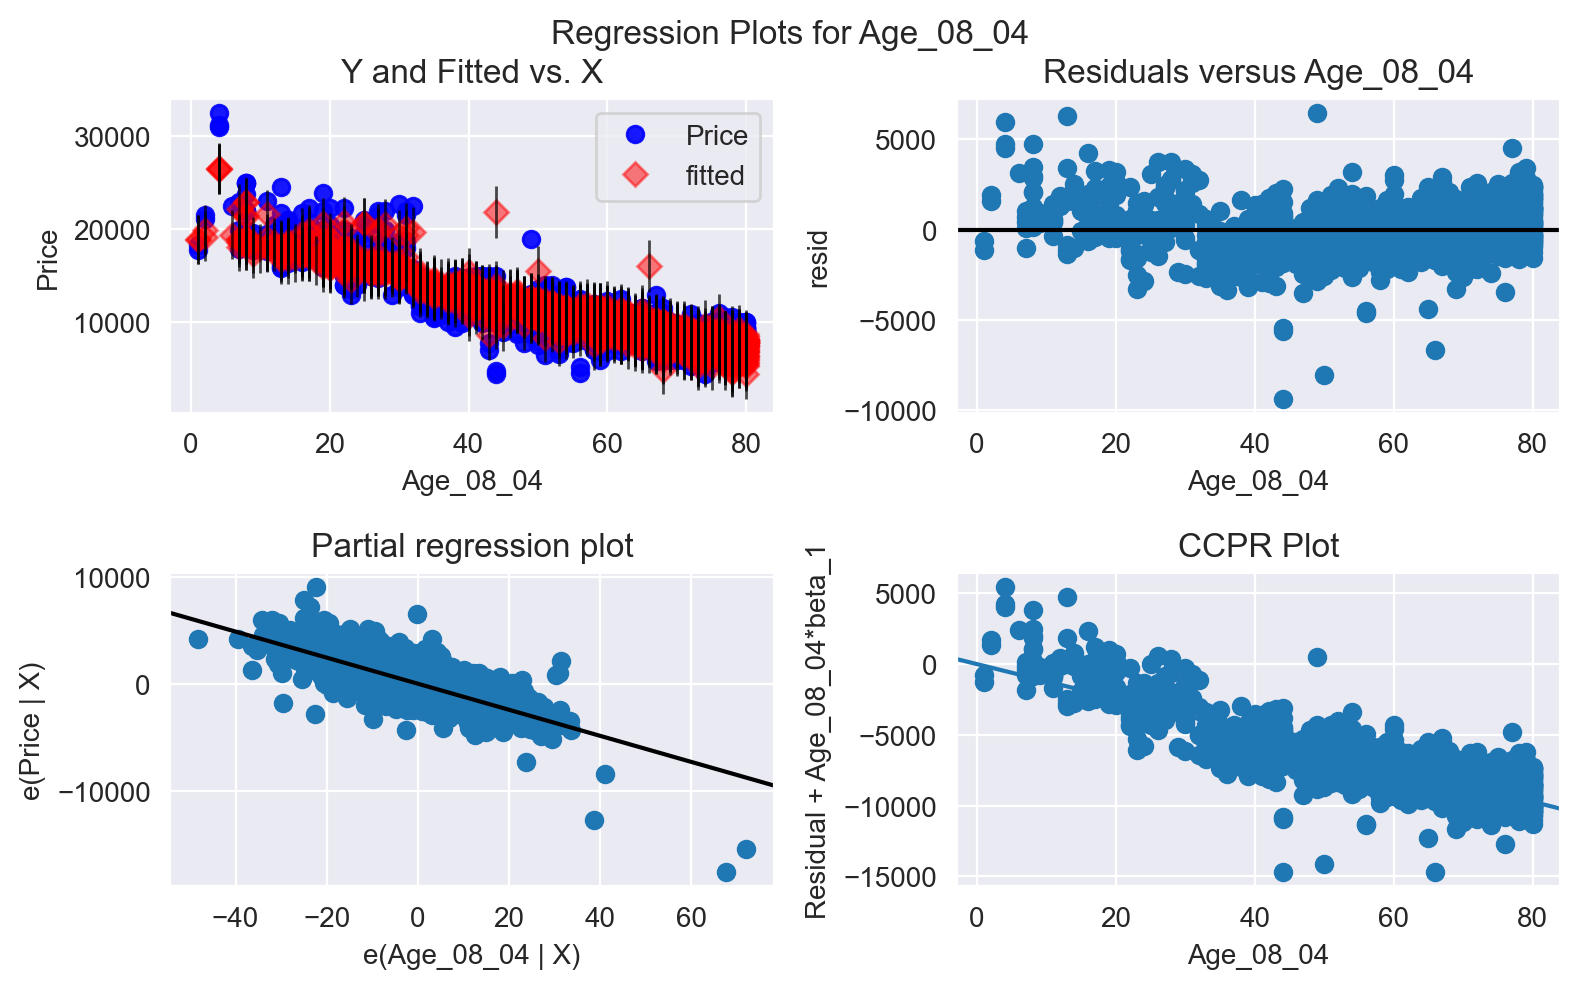

In [27]:
sm.graphics.plot_regress_exog(cc, 'Age_08_04');

eval_env: 1


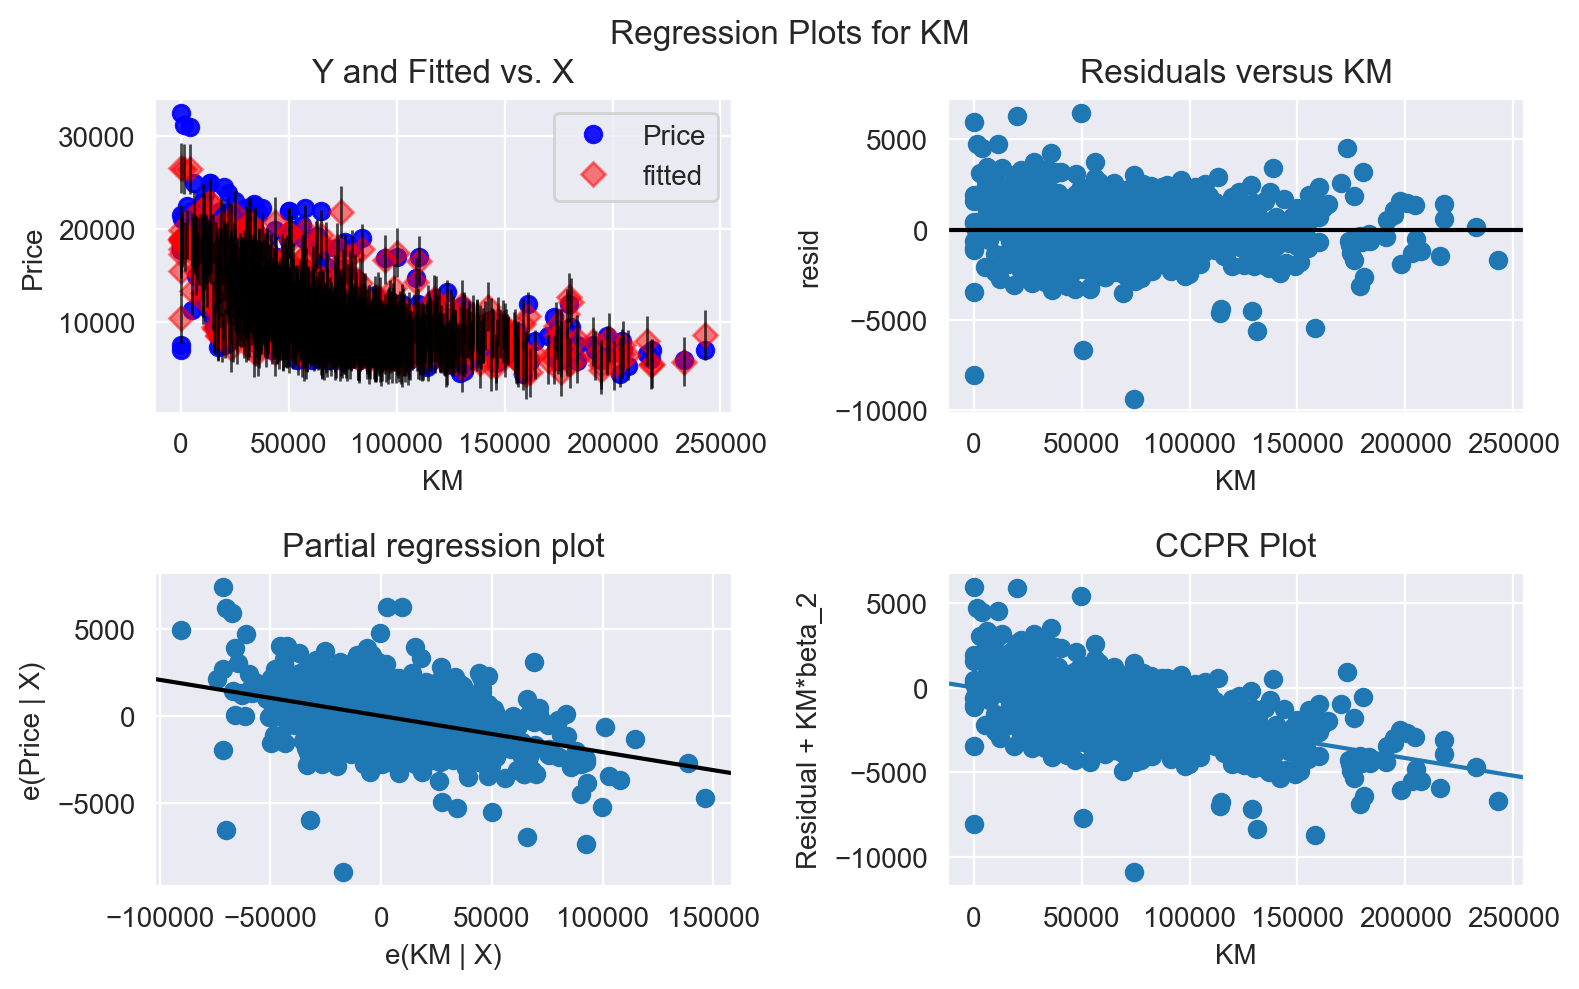

In [28]:
sm.graphics.plot_regress_exog(cc, 'KM');

eval_env: 1


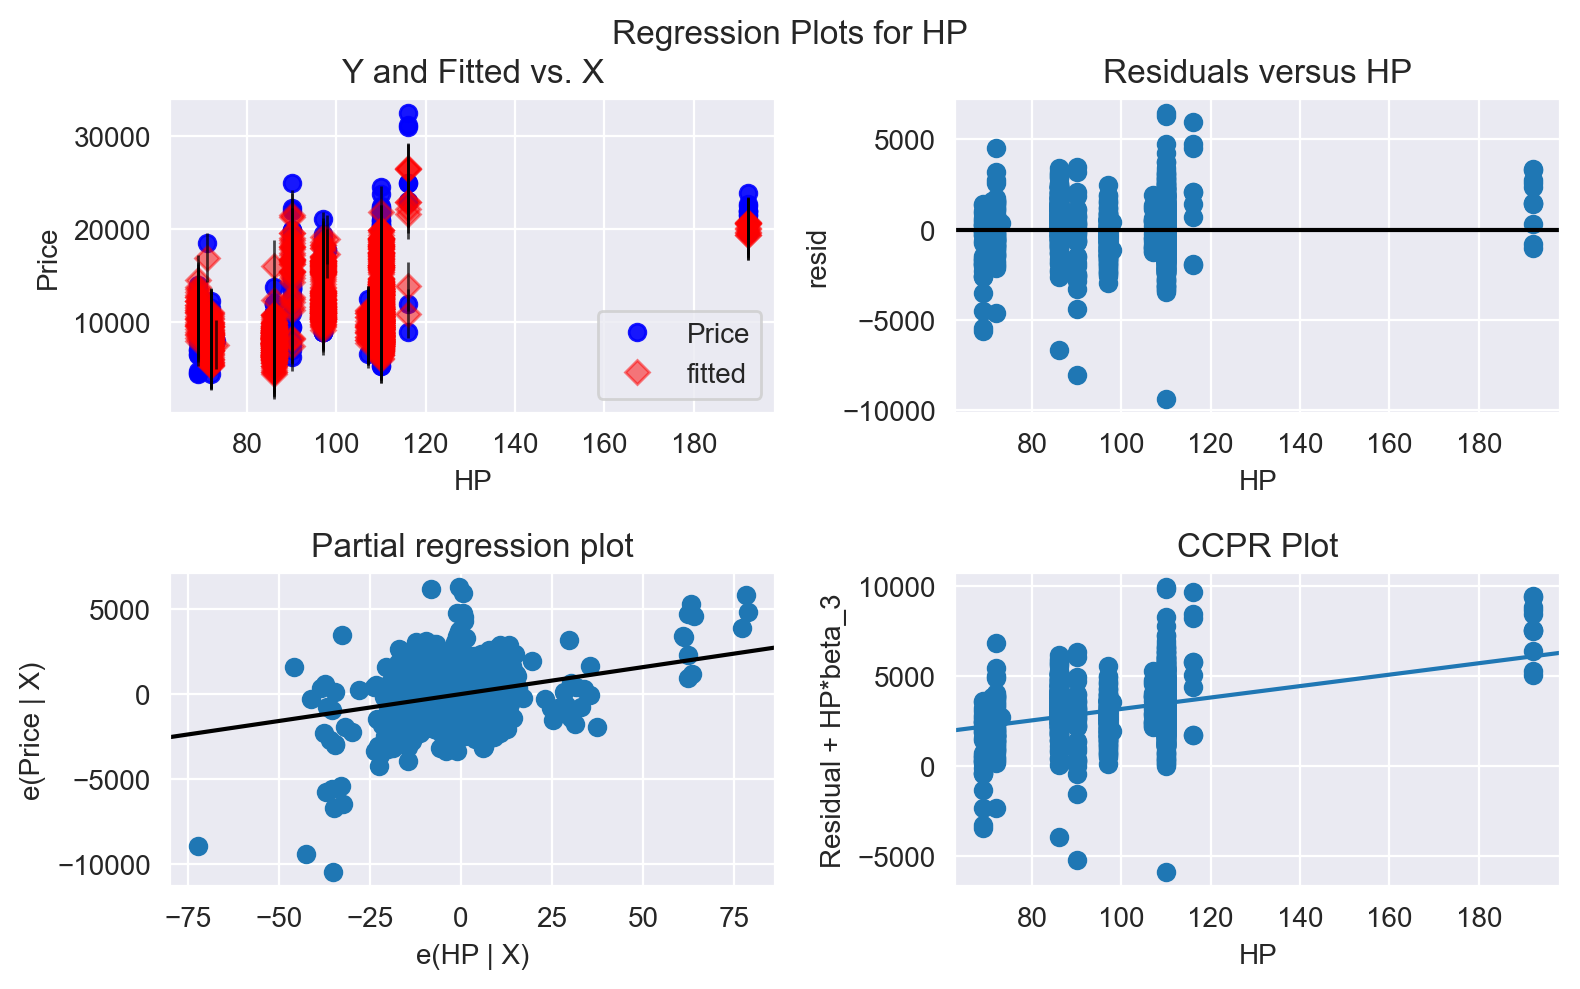

In [29]:
sm.graphics.plot_regress_exog(cc, 'HP');

eval_env: 1


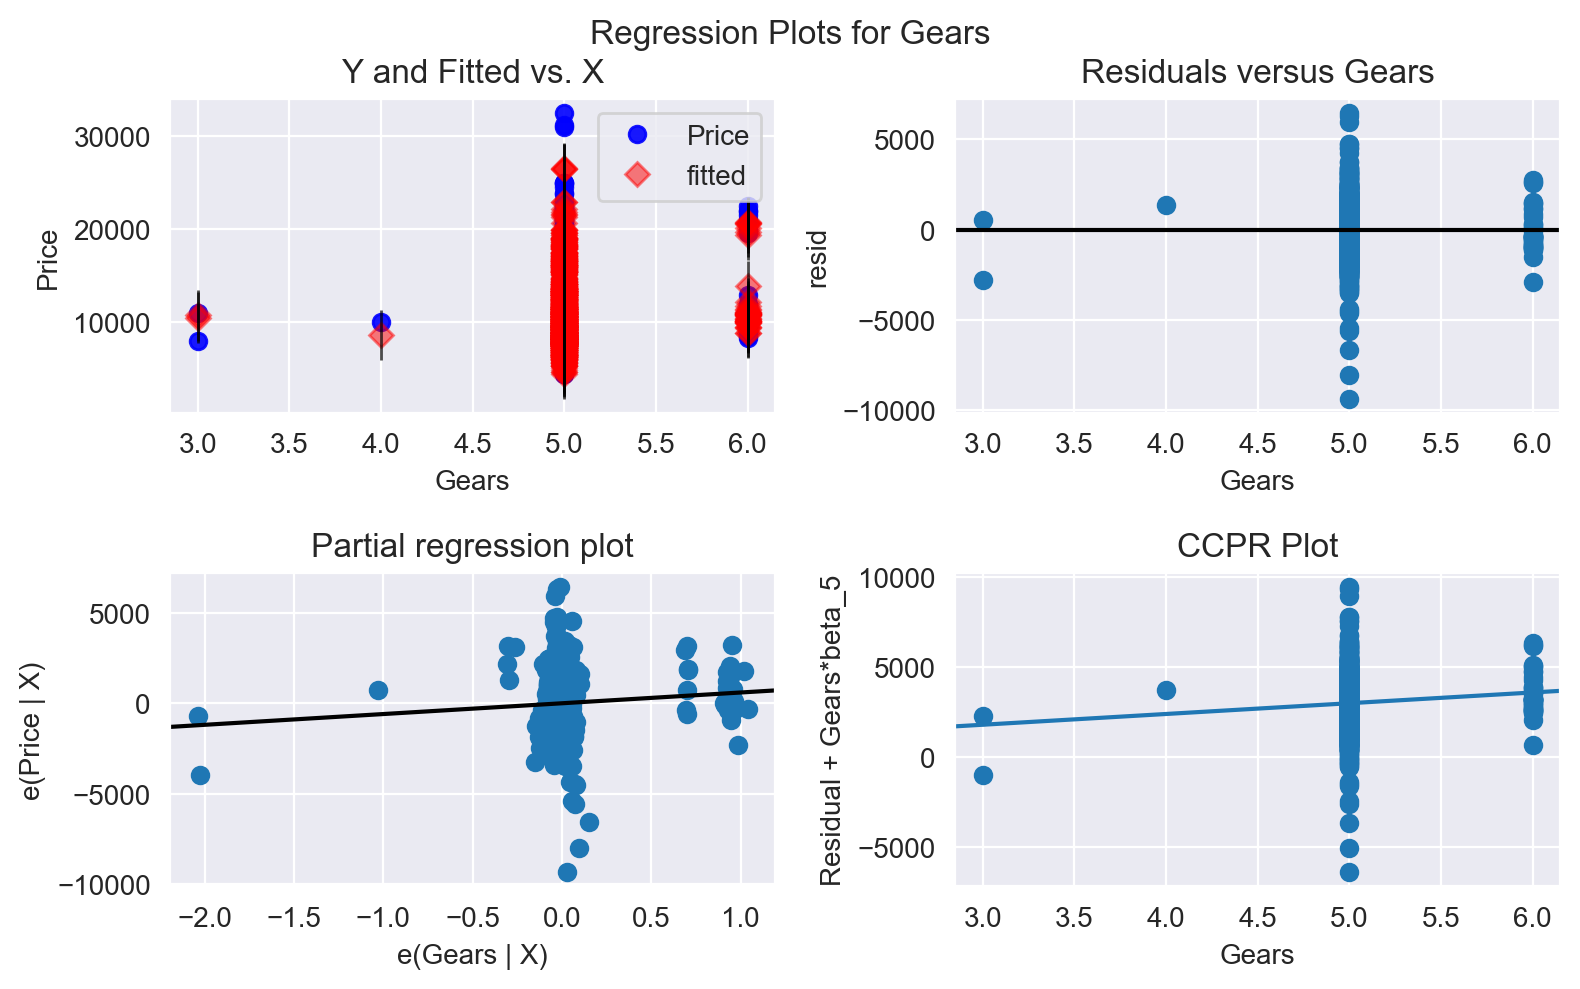

In [30]:
sm.graphics.plot_regress_exog(cc, 'Gears');

eval_env: 1


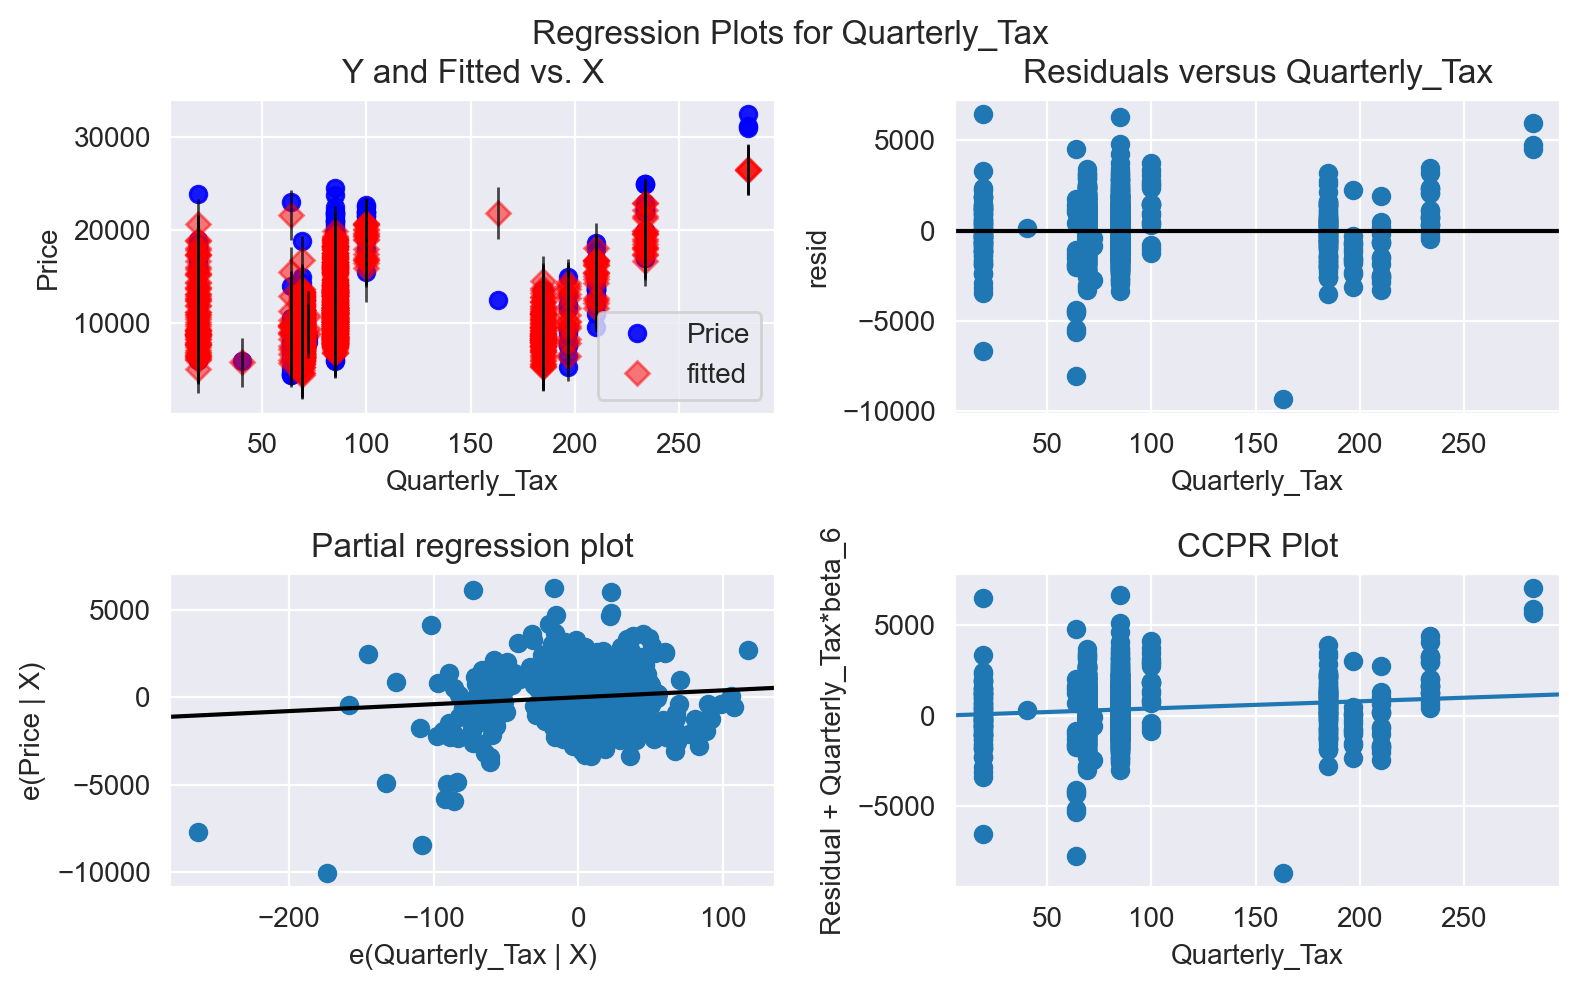

In [31]:
sm.graphics.plot_regress_exog(cc, 'Quarterly_Tax');

eval_env: 1


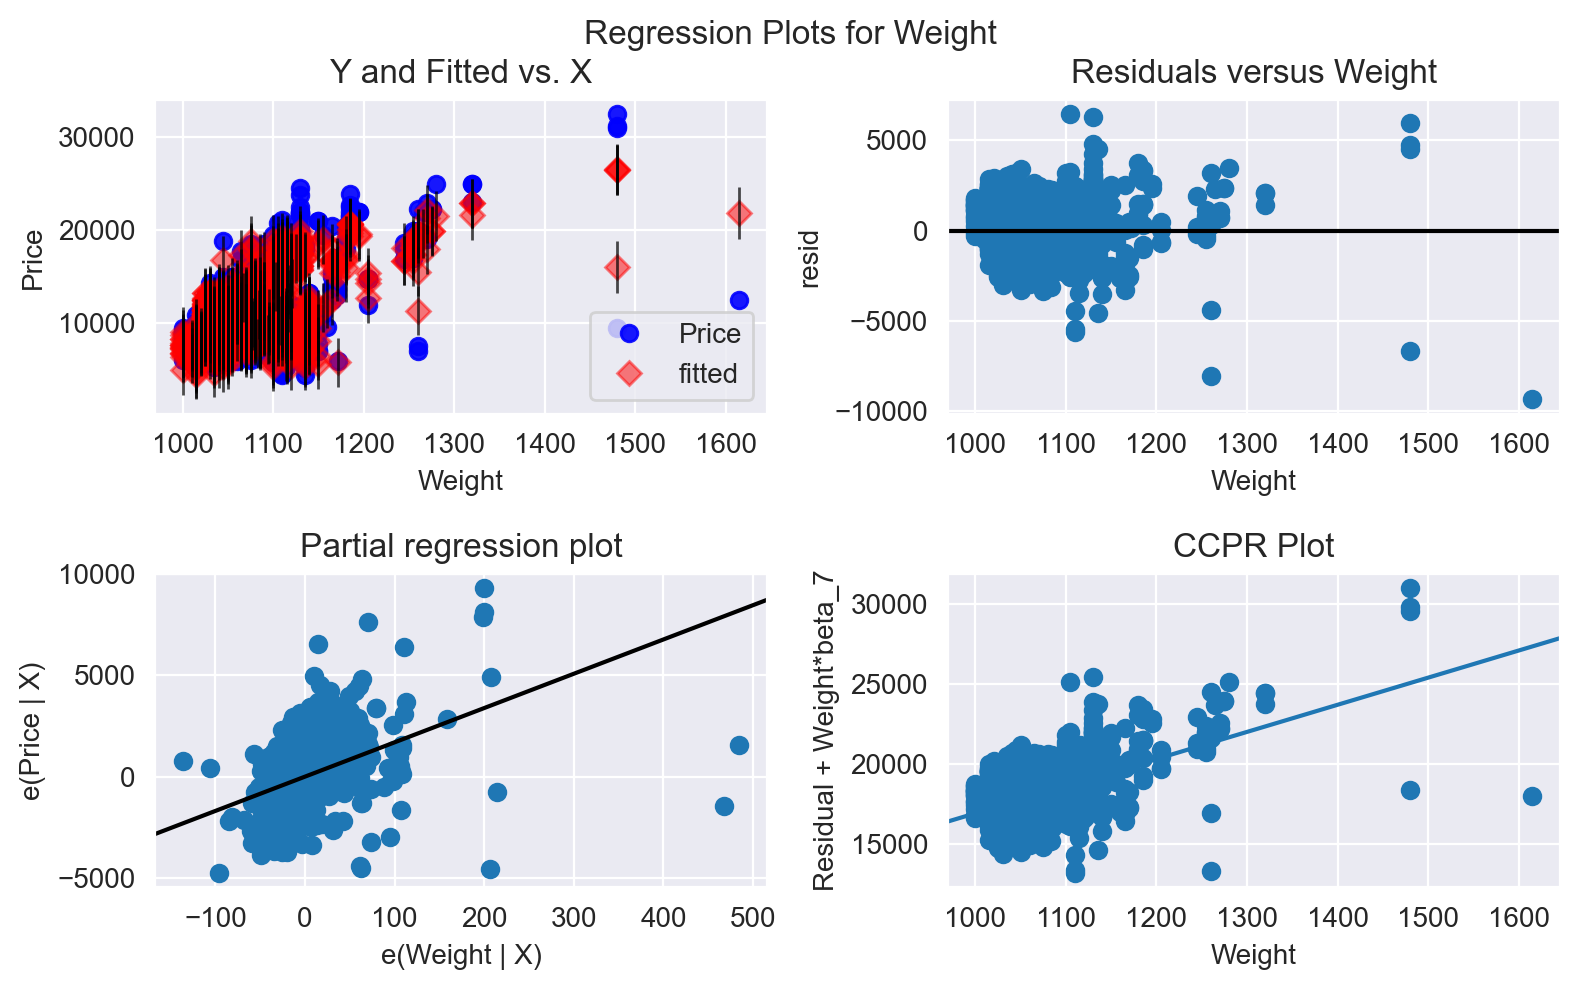

In [32]:
sm.graphics.plot_regress_exog(cc, 'Weight');

# MODEL DELETION TECHNIQUES

### Cook's Distance
- Detecting influencers and outliers

In [33]:
cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()

In [34]:
inf = cc.get_influence()
c, p = inf.cooks_distance
c

array([6.96739575e-03, 3.75784888e-03, 5.28338875e-03, ...,
       9.42322432e-07, 7.44544703e-04, 1.20232081e-02])

<StemContainer object of 3 artists>

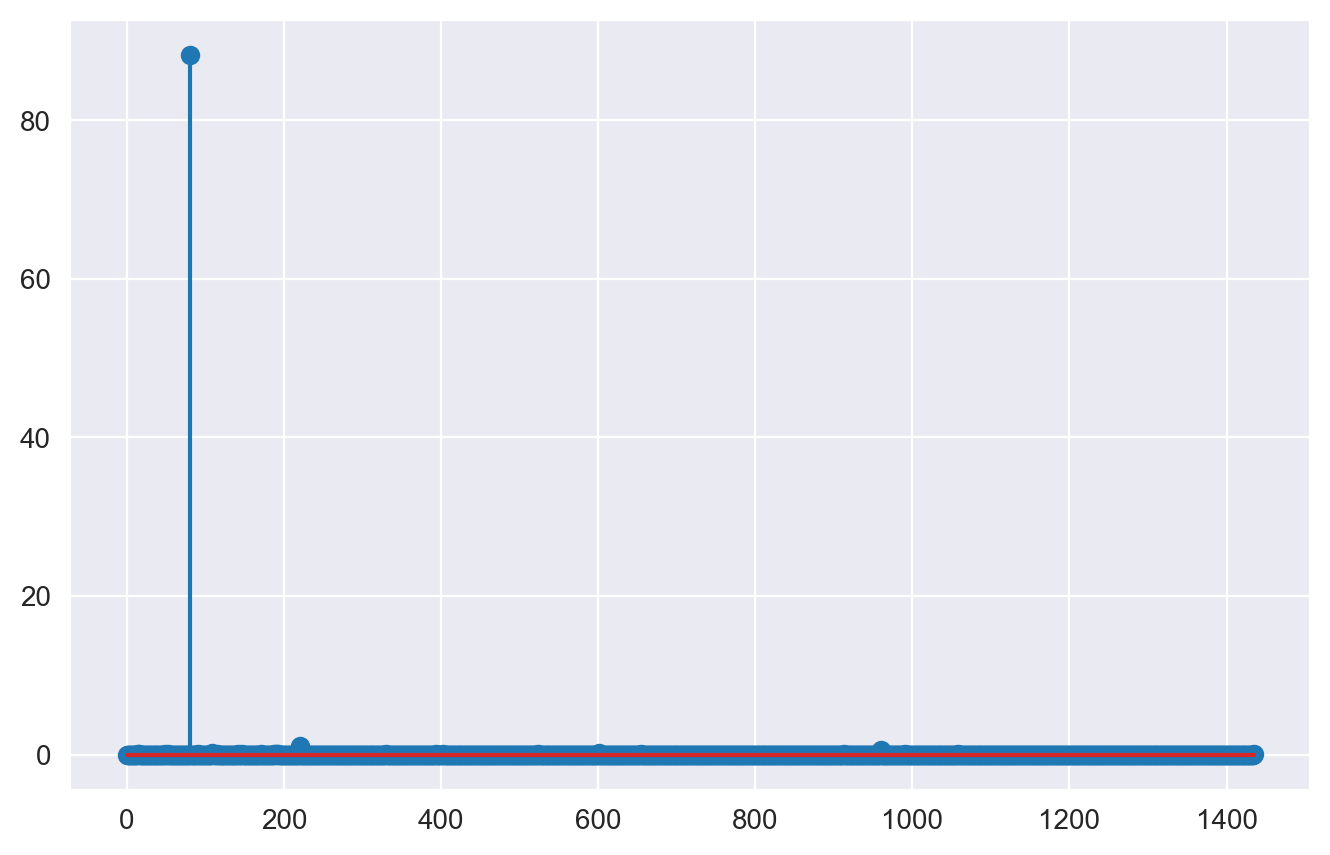

In [35]:
# Cook's distance plot
plt.stem(range(len(df)), c)

In [36]:
np.argmax(c), np.max(c)

(80, 88.2598571029077)

In [37]:
df.iloc[[80]]

Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
Id                                                                          
81  18950         25  20019  110  16000      5      5            100    1180

In [38]:
# Calculating cutoff

k = len(df.columns)
n = len(df)

cutoff = 3*(k+1)/n
cutoff

0.020891364902506964

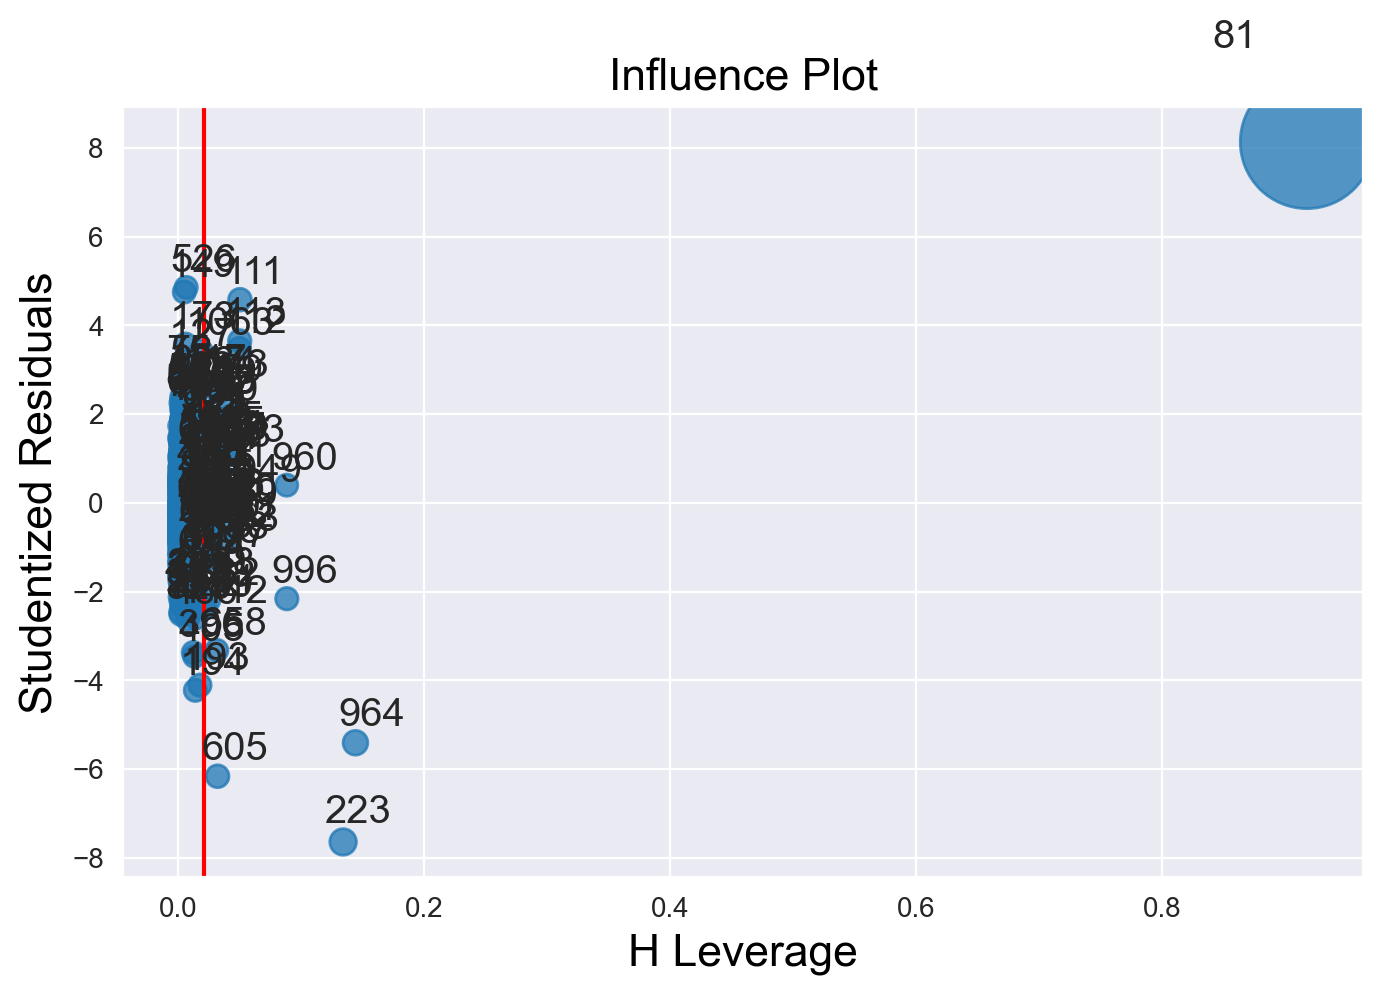

In [39]:
# Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(cc)
plt.axvline(cutoff, color='r')

## Improving The Model

In [40]:
df.drop(index=81, inplace=True)

In [41]:
df.reset_index(inplace=True)

In [42]:
cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()

inf = cc.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

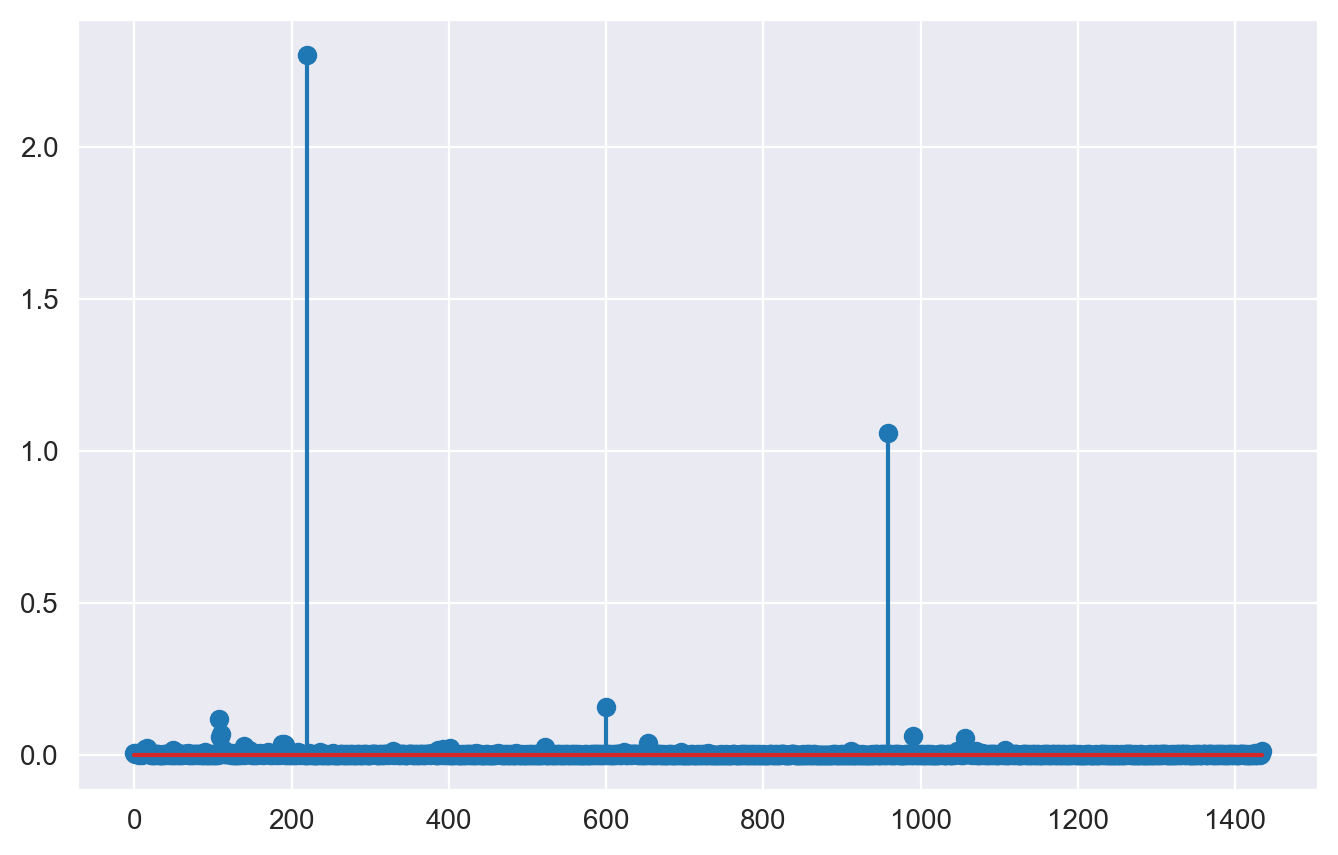

In [43]:
plt.stem(range(len(df)),c)

In [44]:
np.argmax(c),np.max(c)

(220, 2.3034451664541025)

In [45]:
df.drop(index=220, inplace=True)
df.reset_index(inplace=True)

In [46]:
cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()

inf = cc.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

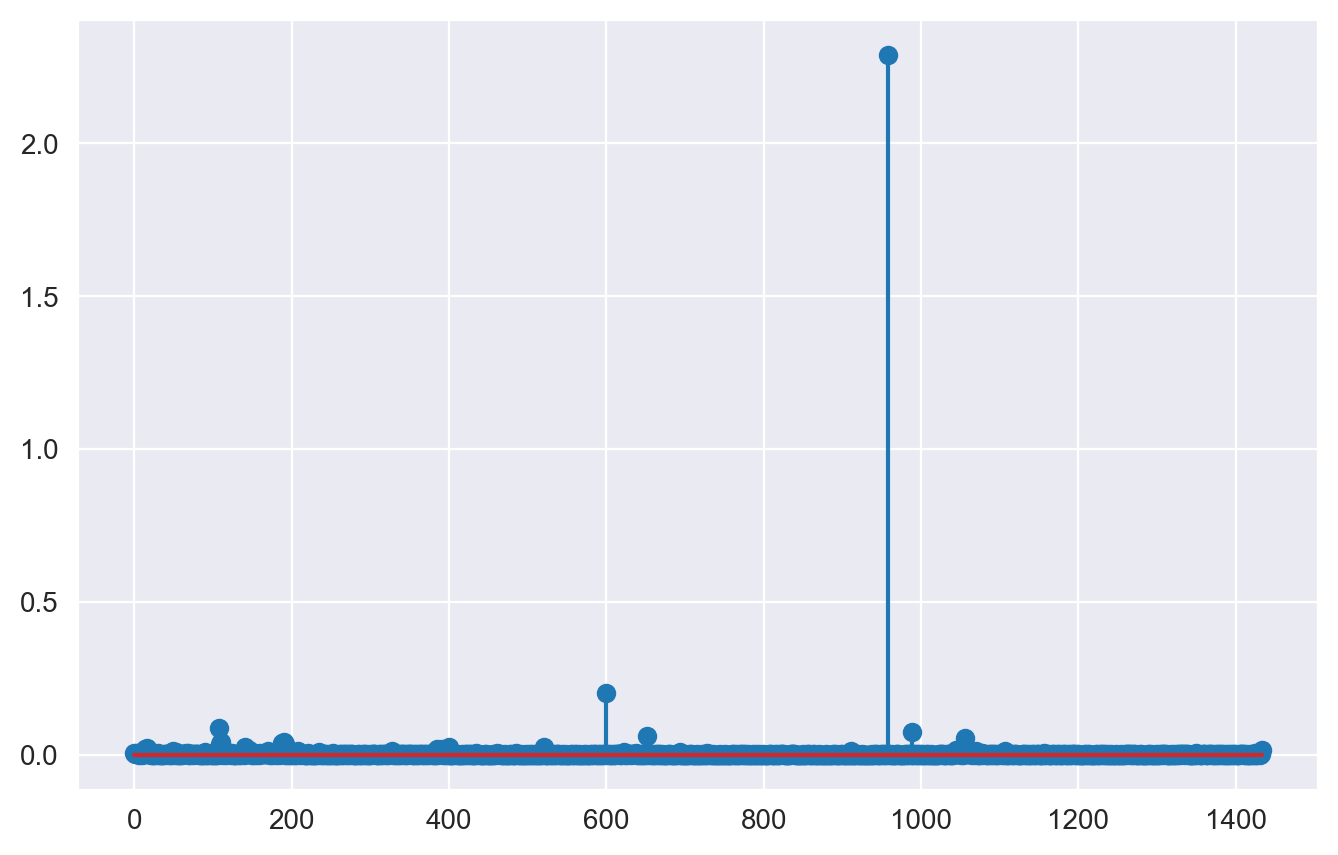

In [47]:
plt.stem(range(len(df)),c)

In [48]:
np.argmax(c),np.max(c)

(958, 2.2907159163045674)

In [49]:
df.drop(index=958, inplace=True)
df.reset_index(inplace=True)

In [50]:
cc = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()

inf = cc.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

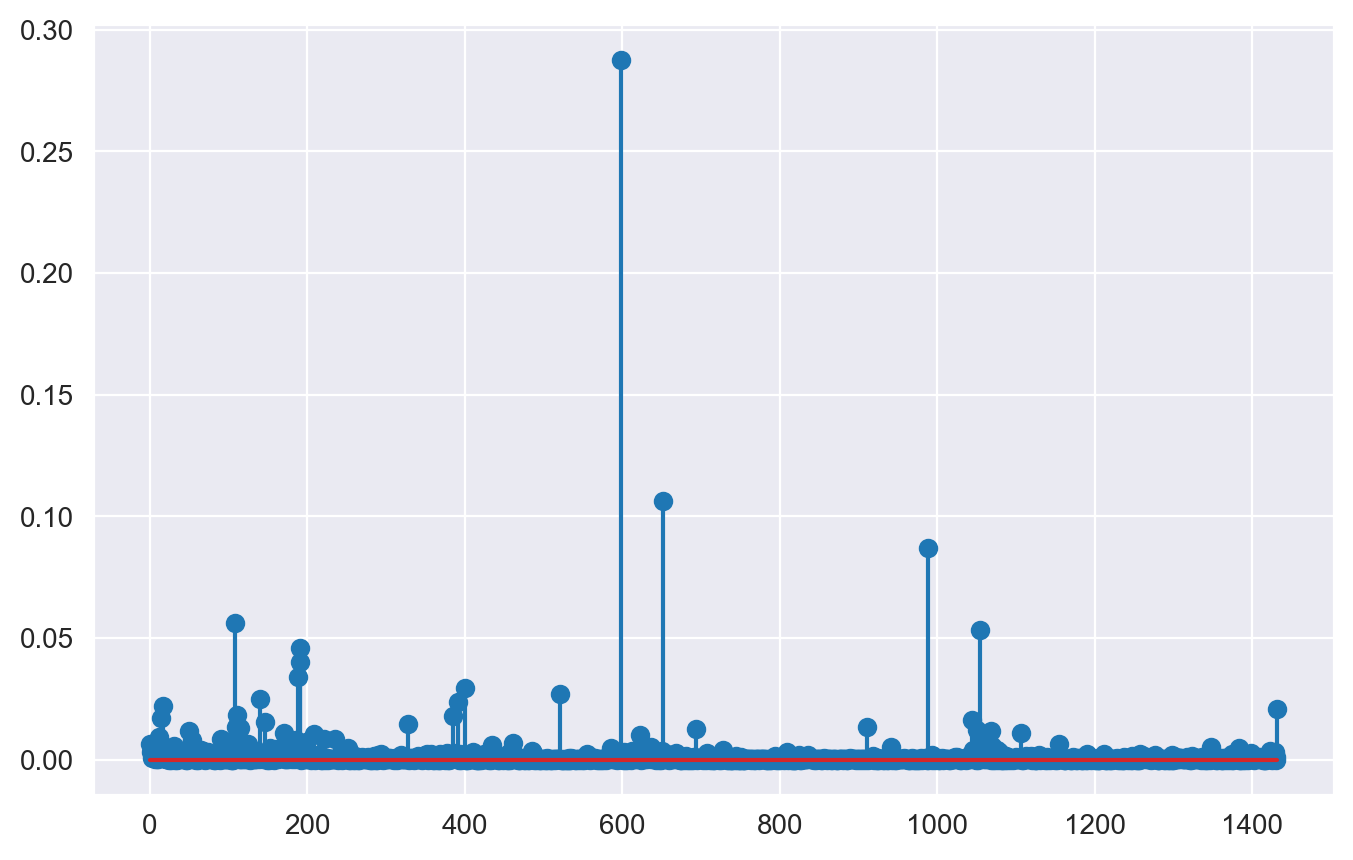

In [51]:
plt.stem(range(len(df)),c)

In [52]:
np.argmax(c),np.max(c)

(599, 0.287722936389568)

### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [53]:
final_model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight', data= df).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1556.
Date:                Tue, 16 May 2023   Prob (F-statistic):               0.00
Time:                        21:46:21   Log-Likelihood:                -12231.
No. Observations:                1433   AIC:                         2.448e+04
Df Residuals:                    1425   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.45e+04   1435.850    -10.098      0.000   -1.73e+04   -1.17e+04
Age_08_04      -112.4015      2.485    -45.237      0.000    -117.276    -107.527
KM               -0.0172      0.001    -14.328      0.000      -0.020      -0.015
HP               35.9449      2.747     13.084      0.000      30.556      41.334
cc               -3.6665      0.301    -12.198      0.000      -4.256      -3.077
Gears           579.2745    178.171      3.251      0.001     229.769     928.780
Quarterly_Tax     5.5368      1.372      4.034      0.000       2.845       8.229
Weight           29.2975      1.227     23.872      0.000      26.890      31.705
==============================================================================
Omnibus:                      109.903   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.356
Skew:                          -0.060   Prob(JB):                    1.41e-124
Kurtosis:                       6.088   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction for new data

In [54]:
newdata = pd.DataFrame({
    'Age_08_04' : [10, 30, 50, 70, 30],
    'KM' : [50000, 100000, 150000, 200000, 50000],
    'HP' : [80, 110, 140, 170, 200],
    'cc' : [1400, 1500, 1600, 1700, 1800],
    'Gears' : [3, 4, 5, 6, 6],
    'Quarterly_Tax' : [20, 90, 160, 230, 250],
    'Weight' : [1100, 1250, 1400, 1550, 1700]
})
newdata

Age_08_04      KM   HP    cc  Gears  Quarterly_Tax  Weight
0         10   50000   80  1400      3             20    1100
1         30  100000  110  1500      4             90    1250
2         50  150000  140  1600      5            160    1400
3         70  200000  170  1700      6            230    1550
4         30   50000  200  1800      6            250    1700

In [55]:
newdata['Price'] = final_model.predict(newdata)
newdata

Age_08_04      KM   HP    cc  Gears  Quarterly_Tax  Weight         Price
0         10   50000   80  1400      3             20    1100  15334.170584
1         30  100000  110  1500      4             90    1250  18298.224063
2         50  150000  140  1600      5            160    1400  21262.277541
3         70  200000  170  1700      6            230    1550  24226.331020
4         30   50000  200  1800      6            250    1700  36522.723276

In [56]:
R_table = pd.DataFrame({
    'Model Name' : ['model', 'model-1', 'model-2', 'cc', 'doors', 'final model(cc)'],
    
    'Model R^2 value' : [model.rsquared, model1.rsquared, model2.rsquared, cc.rsquared,
                         doors.rsquared, final_model.rsquared]
})
R_table

Model Name  Model R^2 value
0            model         0.863763
1          model-1         0.015974
2          model-2         0.034346
3               cc         0.884323
4            doors         0.863590
5  final model(cc)         0.884323